<a href="https://colab.research.google.com/github/Tissyjohnson/DSA_Class_Activities/blob/main/Regression_Classification_TissyJohnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

In [34]:
data.shape

(1599, 12)

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [39]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

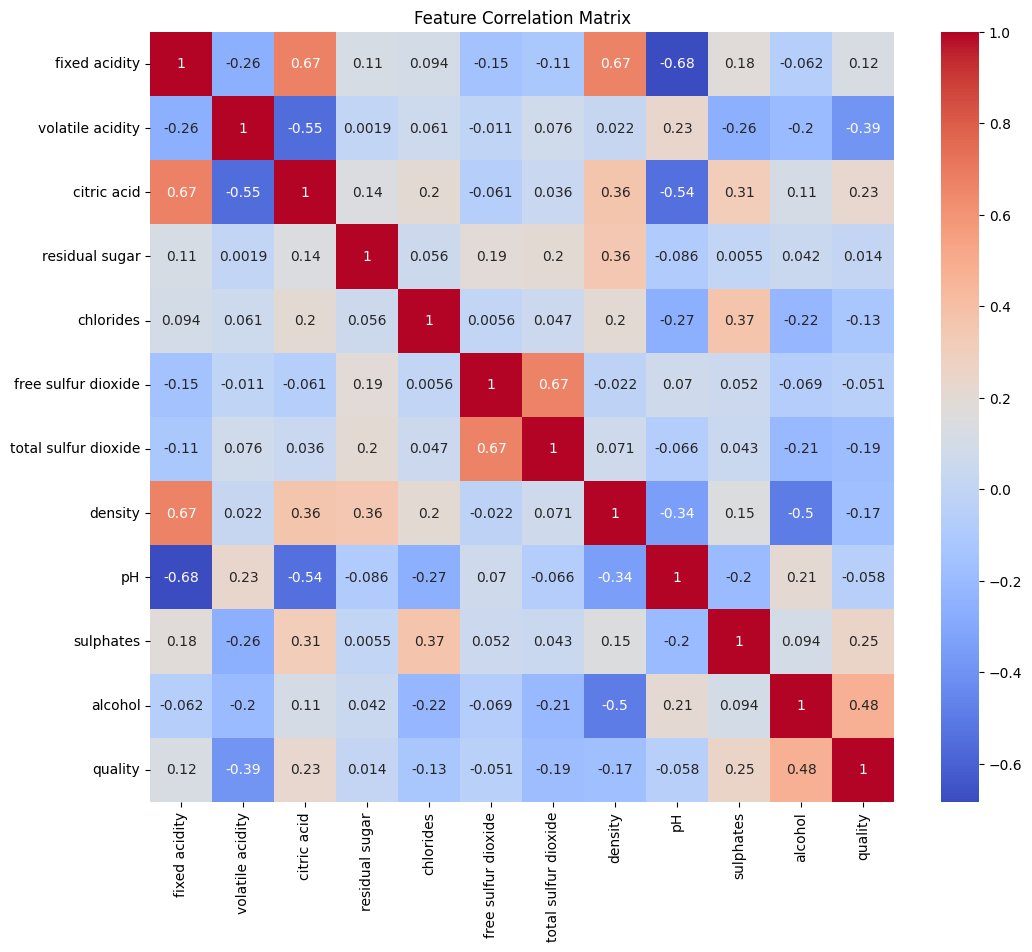

In [42]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [43]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [44]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [45]:
le = LabelEncoder()
y = le.fit_transform(y)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n=== Logistic Regression ===")
print("Confusion Matrix:\n", cm_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))

sample = X_test[0].reshape(1, -1)
print(f"Prediction for first test sample: {lr_model.predict(sample)[0]} (0=Not Good, 1=Good)")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))



=== Logistic Regression ===
Confusion Matrix:
 [[270   7]
 [ 27  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320

Prediction for first test sample: 0 (0=Not Good, 1=Good)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



In [49]:
neighborsi = list(range(1, 21))
metric_ki = []

for k in neighborsi:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metric_ki.append(accuracy_score(y_test, y_pred))


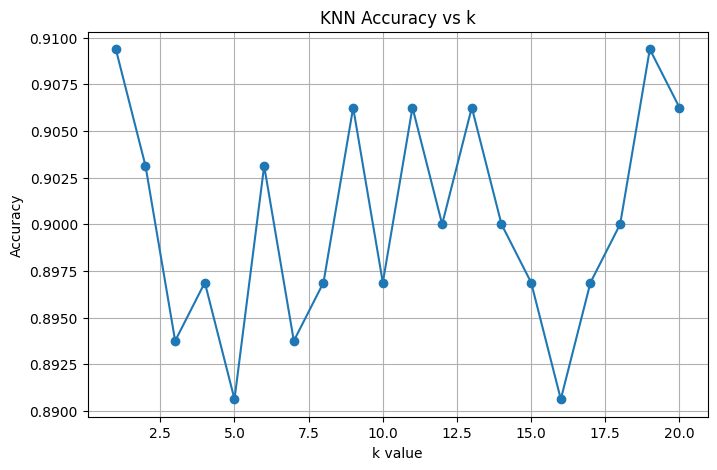

In [50]:
plt.figure(figsize=(8,5))
plt.plot(neighborsi, metric_ki, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title("KNN Accuracy vs k")
plt.grid()
plt.show()

In [51]:
best_k = neighborsi[np.argmax(metric_ki)]
print(f"Best k: {best_k} with accuracy {max(metric_ki):.4f}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Best k: 1 with accuracy 0.9094


In [52]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\n=== KNN ===")
print("Confusion Matrix:\n", cm_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))
print(f"Prediction for first test sample: {knn_model.predict(sample)[0]} (0=Not Good, 1=Good)")



=== KNN ===
Confusion Matrix:
 [[263  14]
 [ 15  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       277
           1       0.67      0.65      0.66        43

    accuracy                           0.91       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.91      0.91      0.91       320

Prediction for first test sample: 0 (0=Not Good, 1=Good)


In [53]:
results = [
    ["Logistic Regression", accuracy_score(y_test, y_pred_lr),
     precision_score(y_test, y_pred_lr, zero_division=0),
     recall_score(y_test, y_pred_lr, zero_division=0)],
    ["KNN", accuracy_score(y_test, y_pred_knn),
     precision_score(y_test, y_pred_knn, zero_division=0),
     recall_score(y_test, y_pred_knn, zero_division=0)]
]

In [54]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall"])
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.893750   0.695652  0.372093
1                  KNN  0.909375   0.666667  0.651163


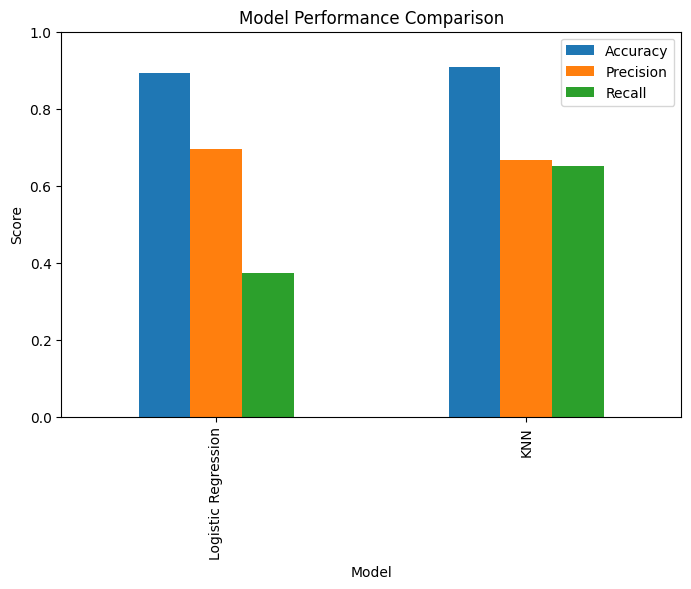

In [55]:
results_df.set_index("Model")[["Accuracy","Precision","Recall"]].plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()